# TP Clustering - Partie 1

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster


## Méthode K-Means

In [133]:
from scipy.io import arff

def data_as_np(path):
    databrut = arff.loadarff(open(path,"r"))
    data = [[x[0], x[1]] for x in databrut[0]]
    return data

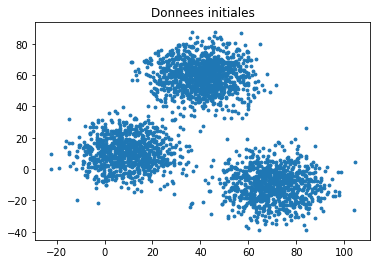

In [135]:
datanp = data_as_np("./artificial/xclara.arff")

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

Exemple avec 3 clusters :

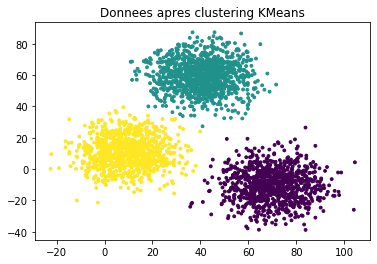

nb clusters =  3 , nb iter =  3 , runtime =  115.98  ms


In [136]:
datanp = data_as_np("./artificial/xclara.arff")
def kmean(k,datanp):
    tps1 = time.time()
    model = cluster.KMeans(n_clusters = k, init = 'k-means++')
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    return labels,tps1,tps2,iteration

k=3
labels,tps1,tps2,iteration = kmean(k,datanp)
labelsKMean = labels
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

### Calcul de silhouette

In [137]:
#Creation d'un graphique
def graph(l,name):
    plt.bar([i for i in range(2,len(l)+2)],l) 
    plt.title('Indice de '+name)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

In [138]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

sil_score_list = []
dv_score_list = []
ch_score_list = []

# Calcul des métriques
datanp=data_as_np("./artificial/xclara.arff")
tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    km = KMeans(n_clusters=i)
    km.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),km.predict(datanp))
    dv_score  = davies_bouldin_score(np.array(datanp),km.predict(datanp))
    ch_score  = calinski_harabasz_score(np.array(datanp),km.predict(datanp))
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)
tps2 = time.time()

print("Runtime = ",round((tps2-tps1)*1000,2)," ms")

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...
Runtime =  3433.34  ms



Silhouette SCORE :


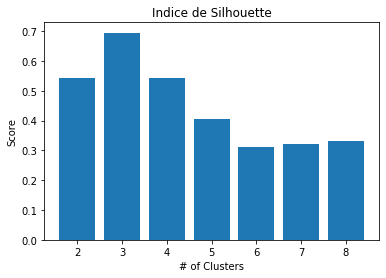

Nombre clusters =  3

Davies-Bouldin SCORE :


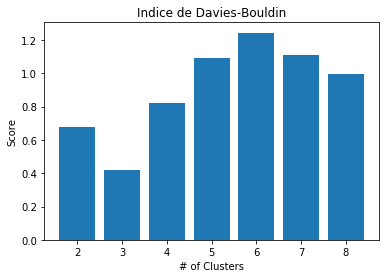

Nombre clusters =  3

Calinski-Harabasz SCORE :


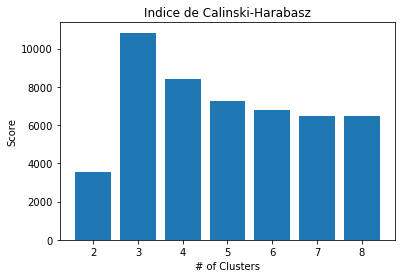

Nombre clusters =  3


In [139]:
#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

Le calcul des métriques nous indique que le nombre optimal de cluster est de 3

### Limites de K-Means

Pour les jeux de données en spiral, en rings et en smile, la méthode k-means va avoir du mal a déterminer les clusters :

SPIRAL :

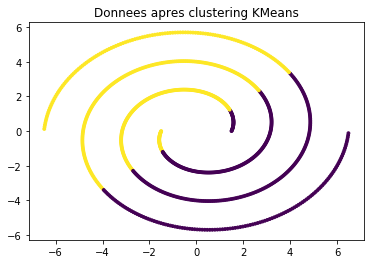

nb clusters =  2 , nb iter =  8 , runtime =  152.85  ms


In [140]:
# Appel de kmeans
datanp=data_as_np("./artificial/spiral.arff")
k=2
labels,tps1,tps2,iteration = kmean(k,datanp)

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

In [141]:
# Itération et calcul des métriques
sil_score_list = []
dv_score_list = []
ch_score_list = []

tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    km = KMeans(n_clusters=i)
    km.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),km.predict(datanp))
    dv_score  = davies_bouldin_score(np.array(datanp),km.predict(datanp))
    ch_score  = calinski_harabasz_score(np.array(datanp),km.predict(datanp))
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)
tps2 = time.time()

print()
print("Runtime = ",round((tps2-tps1)*1000,2)," ms")

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...

Runtime =  2504.92  ms



Silhouette SCORE :


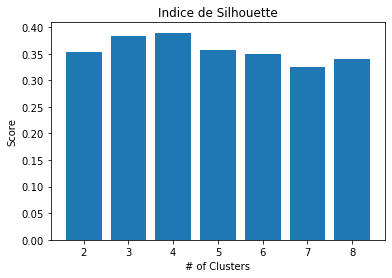

Nombre clusters =  4

Davies-Bouldin SCORE :


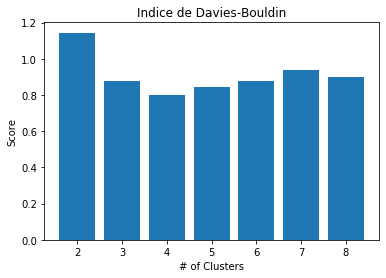

Nombre clusters =  4

Calinski-Harabasz SCORE :


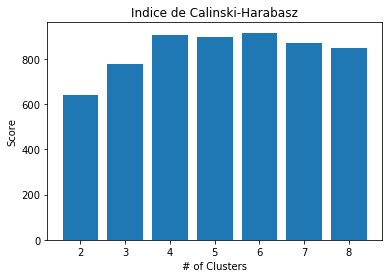

Nombre clusters =  6


In [142]:
#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

RINGS

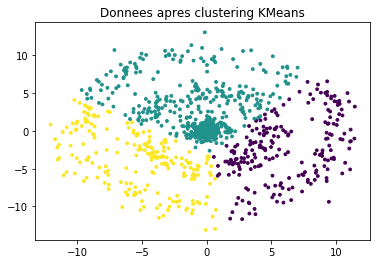

nb clusters =  3 , nb iter =  9 , runtime =  101.98  ms


In [144]:
# Appel de kmeans
datanp=data_as_np("./artificial/rings.arff")
k=3
labels,tps1,tps2,iteration = kmean(k,datanp)

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

SMILE1

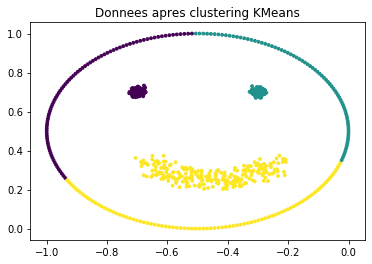

nb clusters =  3 , nb iter =  4 , runtime =  115.03  ms


In [145]:
# Appel de kmeans
datanp=data_as_np("./artificial/smile1.arff")
k=3
labels,tps1,tps2,iteration = kmean(k,datanp)

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

## Méthode K-Medoids

On reprend le dataset initial

In [146]:
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

def kmedoid(k,data):
    distmatrix = euclidean_distances(data)
    tps1=time.time()
    fp = kmedoids.fasterpam(distmatrix,k) #Utilisation de l'algo FasterPAM
    tps2=time.time()
    runtime=round((tps2-tps1)*1000,2)
    return fp, runtime

In [147]:
# Itération et calcul des métriques
sil_score_list = []
dv_score_list = []
ch_score_list = []

datanp=data_as_np("./artificial/xclara.arff")
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    model, runtime= kmedoid(i,datanp)
    labels = model.labels
    sil_score = silhouette_score(np.array(datanp),labels)
    dv_score  = davies_bouldin_score(np.array(datanp),labels)
    ch_score  = calinski_harabasz_score(np.array(datanp),labels)
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...



Silhouette SCORE :


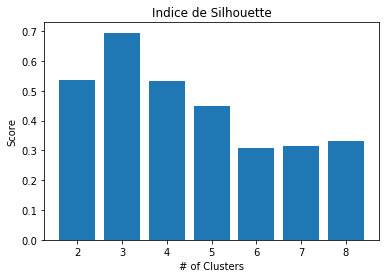

Nombre clusters =  3

Davies-Bouldin SCORE :


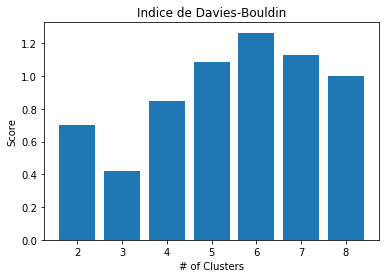

Nombre clusters =  3

Calinski-Harabasz SCORE :


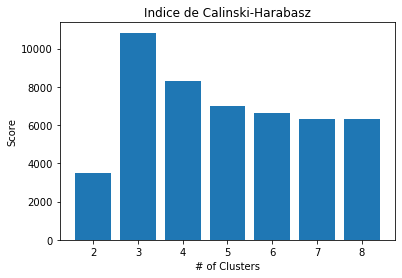

Nombre clusters =  3


In [148]:
#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

### Applications

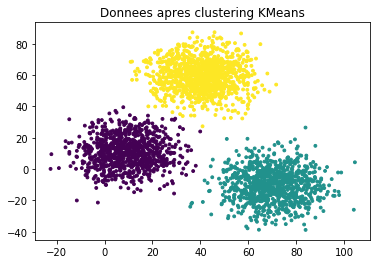

nb clusters =  3 , nb iter =  4 , runtime =  115.03  ms


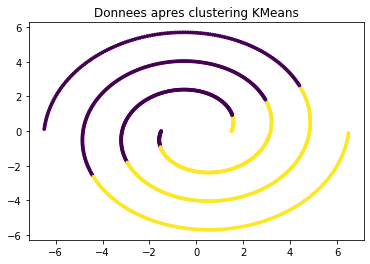

nb clusters =  2 , nb iter =  4 , runtime =  115.03  ms


In [149]:
# Appel de kmedoids
datanp=data_as_np("./artificial/xclara.arff")
k=3
model, runtime= kmedoid(k,datanp)
labels = model.labels

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")


## ----------
# Appel de kmedoids
datanp=data_as_np("./artificial/spiral.arff")
k=2
model, runtime= kmedoid(k,datanp)
labels = model.labels

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

### Comparaison Kmeans et Kmedoids

In [150]:
from sklearn.metrics import rand_score
from sklearn.metrics import mutual_info_score


compare_array = []


#Comparaison des runtime
for [name,k] in (['xclara',3], ['simplex',4], ['fourty',40]) :
    datanp=data_as_np("./artificial/"+name+".arff")

    # Calcul de Kmeans
    tps1 = time.time()
    model_kmeans = cluster.KMeans(n_clusters=k, init='k-means++')
    model_kmeans.fit(datanp)
    tps2 = time.time()
    runtime_kMeans=round((tps2-tps1)*1000,2)

    # Calcul de Kmedoids
    distmatrix = euclidean_distances(datanp)
    tps1=time.time()
    model_kmedoids = kmedoids.fasterpam(distmatrix,k) #Utilisation de l'algo FasterPAM
    tps2=time.time()
    runtime_kMedoids=round((tps2-tps1)*1000,2)


    r_score  = rand_score(model_kmedoids.labels, model_kmeans.labels_)
    mi_score = mutual_info_score(model_kmedoids.labels, model_kmeans.labels_)

    compare_array.append([name, runtime_kMeans, runtime_kMedoids, r_score, mi_score])
print(compare_array)

[['xclara', 120.04, 109.42, 1.0, 1.0929325398637173], ['simplex', 17.56, 4.98, 1.0, 1.386230358388944], ['fourty', 263.17, 67.07, 1.0, 3.6888794541139363]]


# Clustering agglomératif

### Dendogramme et recherche de clusters

In [151]:
import scipy.cluster.hierarchy as shc

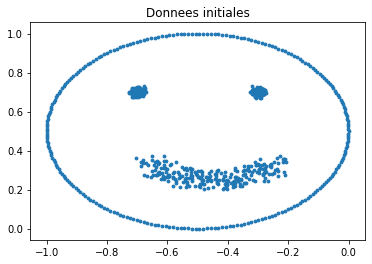

Dendrogramme 'single' donnees initiales


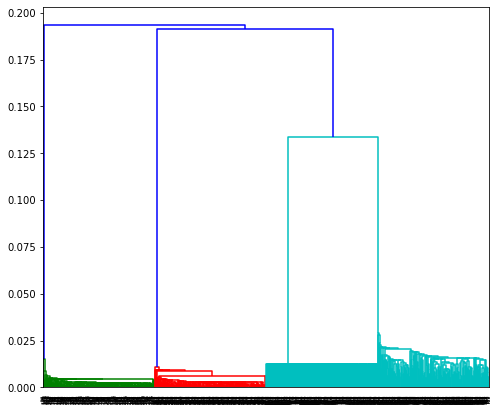

In [152]:
datanp=data_as_np("./artificial/smile1.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

#Donnees dans datanp
print("Dendrogramme 'single' donnees initiales")

linked_mat = shc.linkage(datanp,'single')
plt.figure(figsize=(8,7))
shc.dendrogram(linked_mat, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.show()

In [153]:
def cluster_agglo(distance_treshold,linkage, nb_cluster):
    tps1=time.time()
    model=cluster.AgglomerativeClustering(distance_threshold=distance_treshold, linkage=linkage, n_clusters=nb_cluster)
    model=model.fit(datanp)
    tps2=time.time()
    runtime=round((tps2-tps1)*1000,2)
    return model, runtime

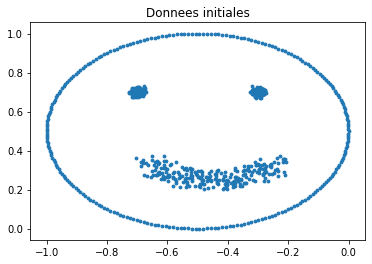

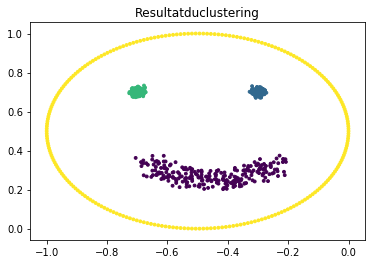

nbclusters= 4 ,nbfeuilles= 1000 runtime= 14.47 ms


In [154]:
datanp=data_as_np("./artificial/smile1.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

#Affichage clustering
model, runtime = cluster_agglo(None,'single',4)
plt.scatter(f0,f1,c=model.labels_,s=8)
plt.title("Resultatduclustering")
plt.show()
print("nbclusters=",model.n_clusters_,",nbfeuilles=",model.n_leaves_,"runtime=",runtime,"ms")

### Essai des métriques

In [155]:
# Itération et calcul des métriques
sil_score_list = []
dv_score_list = []
ch_score_list = []

tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    model, runtime = cluster_agglo(None,'single',i)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    dv_score  = davies_bouldin_score(np.array(datanp),model.labels_)
    ch_score  = calinski_harabasz_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)
tps2 = time.time()

print()
print("Runtime = ",round((tps2-tps1)*1000,2)," ms")

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...

Runtime =  588.64  ms



Silhouette SCORE :


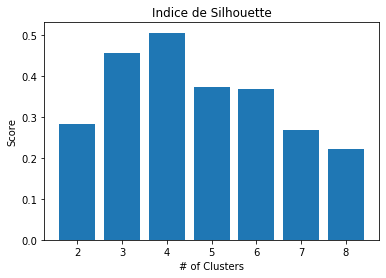

Nombre clusters =  4

Davies-Bouldin SCORE :


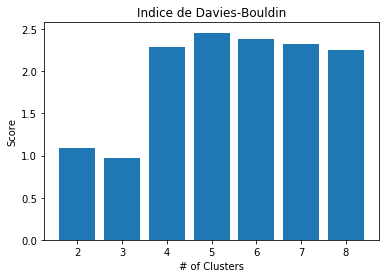

Nombre clusters =  3

Calinski-Harabasz SCORE :


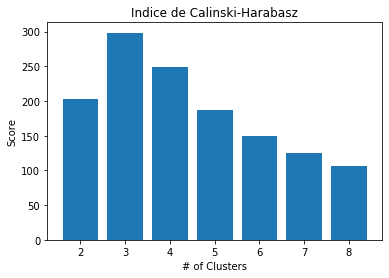

Nombre clusters =  3


In [156]:
#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

On essaie différents liens pour trouver l'optimal, le critère de sélection étant l'indice de silhouette, seul indice fonctionnel.


Silhouette SCORE :


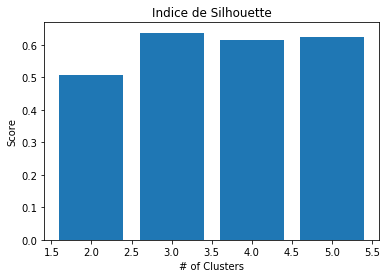


Runtime:


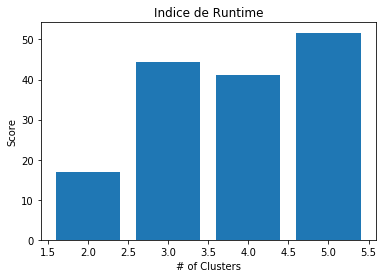

In [159]:
# Différents liens
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

sil_score_list = []
runtime_list = []

for i in ['single', 'average', 'complete', 'ward']:
    model, runtime=cluster_agglo(None, i, 4)
    model=model.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)
    runtime_list.append(runtime)

#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

print()
print("Runtime:")
graph(runtime_list, "Runtime")

Le meilleur des liens semble être average, à la fois en précision et en durée d'exécution

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...

Silhouette SCORE :


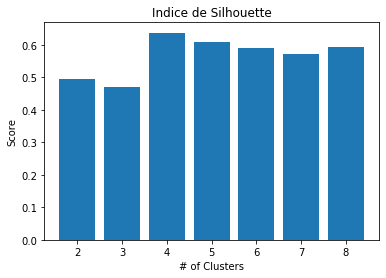

In [160]:
# Différents k
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

sil_score_list = []
runtime_list = []

min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    model, runtime=cluster_agglo(None, 'average', i)
    model=model.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)
    runtime_list.append(runtime)

#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

### Limites de la méthode

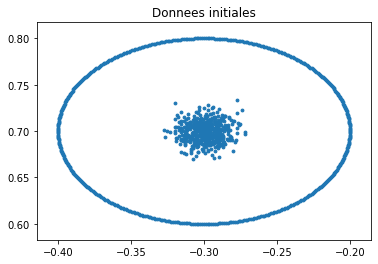

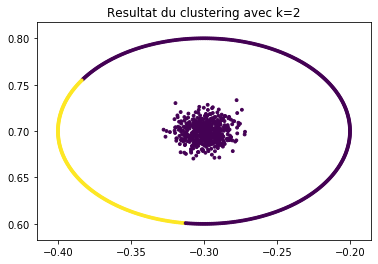

nbclusters= 2 ,nbfeuilles= 1000 runtime= 32.25 ms


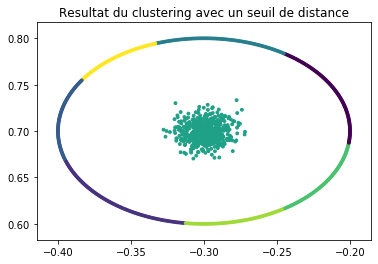

nbclusters= 8 ,nbfeuilles= 1000 runtime= 23.53 ms
Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...

Silhouette SCORE :


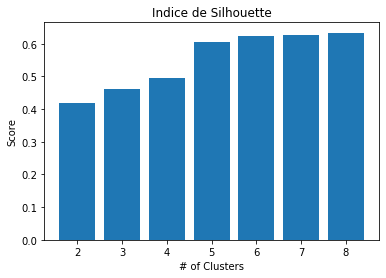

In [161]:
datanp=data_as_np("./artificial/donut1.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

#Affichage clustering
model, runtime = cluster_agglo(None,'average',2)
plt.scatter(f0,f1,c=model.labels_,s=8)
plt.title("Resultat du clustering avec k=2")
plt.show()
print("nbclusters=",model.n_clusters_,",nbfeuilles=",model.n_leaves_,"runtime=",runtime,"ms")

#Affichage clustering
model, runtime = cluster_agglo(0.06,'average',None)
plt.scatter(f0,f1,c=model.labels_,s=8)
plt.title("Resultat du clustering avec un seuil de distance")
plt.show()
print("nbclusters=",model.n_clusters_,",nbfeuilles=",model.n_leaves_,"runtime=",runtime,"ms")


sil_score_list = []

min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    model, runtime=cluster_agglo(None, 'average', i)
    model=model.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)

#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

### Comparaison des méthodes

In [168]:
from sklearn.metrics import rand_score
from sklearn.metrics import mutual_info_score


compare_array = []
rand_score_array = []
mi_array = []

#Comparaison des runtime
for [name,k] in (['xclara',3], ['simplex',4], ['fourty',40]) :
    datanp=data_as_np("./artificial/"+name+".arff")

    # Calcul de Kmeans
    tps1 = time.time()
    model_kmeans = cluster.KMeans(n_clusters=k, init='k-means++')
    model_kmeans.fit(datanp)
    tps2 = time.time()
    runtime_kMeans=round((tps2-tps1)*1000,2)

    # Calcul de Kmedoids
    distmatrix = euclidean_distances(datanp)
    tps1=time.time()
    model_kmedoids = kmedoids.fasterpam(distmatrix,k) #Utilisation de l'algo FasterPAM
    tps2=time.time()
    runtime_kMedoids=round((tps2-tps1)*1000,2)

    # Calcul de Cluster Agglomératif
    tps1=time.time()
    model_cluster_agglo=cluster.AgglomerativeClustering(distance_threshold=None, linkage='average', n_clusters=k)
    model_cluster_agglo=model.fit(datanp)
    tps2=time.time()
    runtime_cluster_agglo=round((tps2-tps1)*1000,2)
    
    r_score_kmedoids_kmean          = rand_score(model_kmedoids.labels, model_kmeans.labels_)
    r_score_kmedoids_cluster_agglo  = rand_score(model_kmedoids.labels, model_cluster_agglo.labels_)
    r_score_kmean_cluster_agglo     = rand_score(model_kmeans.labels_, model_cluster_agglo.labels_)
    mi_score_kmedoids_kmean         = mutual_info_score(model_kmedoids.labels, model_kmeans.labels_)
    mi_score_kmedoids_cluster_agglo = mutual_info_score(model_kmedoids.labels, model_cluster_agglo.labels_)
    mi_score_kmean_cluster_agglo    = mutual_info_score(model_kmeans.labels_, model_cluster_agglo.labels_)
    
    
    compare_array.append([name, runtime_kMeans, runtime_kMedoids, runtime_cluster_agglo])
    rand_score_array.append([r_score_kmedoids_kmean, r_score_kmedoids_cluster_agglo, r_score_kmean_cluster_agglo])
    mi_array.append([mi_score_kmedoids_kmean, mi_score_kmedoids_cluster_agglo, mi_score_kmean_cluster_agglo])
                         
print(compare_array)
print(rand_score_array)
print(mi_array)

[['xclara', 47.34, 111.28, 230.17], ['simplex', 17.21, 4.69, 9.46], ['fourty', 209.41, 67.72, 55.3]]
[[1.0, 0.9933849060798043, 0.9933849060798043], [1.0, 0.9777154308617234, 0.9777154308617234], [1.0, 0.8898898898898899, 0.8898898898898899]]
[[1.0929325398637173, 1.084841451754537, 1.084841451754537], [1.386230358388944, 1.3668057351277314, 1.3668057351277314], [3.6888794541139363, 2.041033214356886, 2.041033214356886]]


## Clustering DBSCAN et HDBSCAN

### Choix des paramêtres

In [169]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

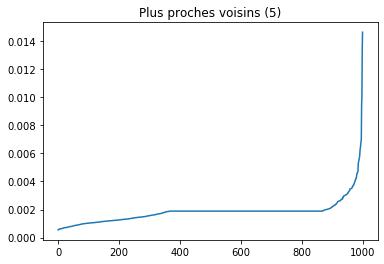

In [170]:
# On choisit epsilon
datanp=data_as_np("./artificial/donut1.arff")
# Distances k plus proches voisins
# Donnees dans X
X = datanp
k=5
neigh=NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances,indices=neigh.kneighbors(X)
#retirer le point "origine"
newDistances = np.asarray([np.average(distances[i][1:])for i in range(0,distances.shape[0])])
trie=np.sort(newDistances)
plt.title("Plus proches voisins (5)")
plt.plot(trie);
plt.show()

Silhouette SCORE :


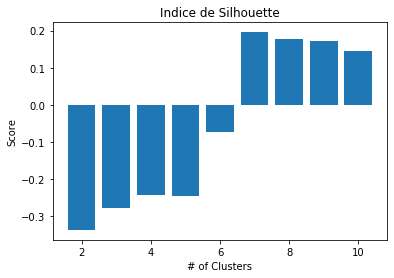


Runtime:


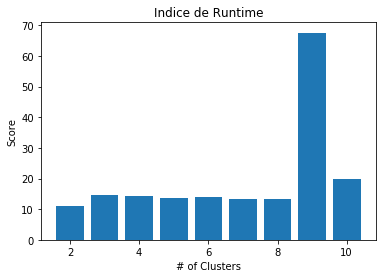

In [171]:
#Affichage clustering
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

sil_score_list = []
runtime_list = []

for i in range(1, 10):
    tps1 = time.time()
    model = DBSCAN(eps=0.003, min_samples=i).fit(datanp)
    tps2 = time.time()
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)
    runtime_list.append(round((tps2-tps1)*1000,2))

# Comparaison des silhouette score
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

# Comparaison des temps d'exécution
print()
print("Runtime:")
graph(runtime_list, "Runtime")

Les deux meilleures valeurs pour ce dataset sont eps=6, minimum de samples=6

### Applications

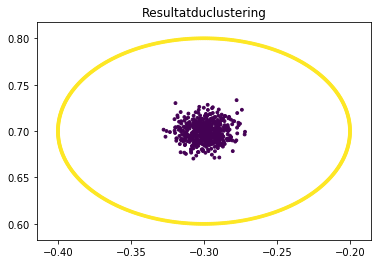

In [172]:
datanp=data_as_np("./artificial/donut1.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

#plt.scatter(f0, f1, s=8)
#plt.title("Donnees initiales")
#plt.show()

#Affichage clustering
model = DBSCAN(eps=0.014, min_samples=7).fit(datanp)
plt.scatter(f0,f1,c=model.labels_,s=8)
plt.title("Resultatduclustering")
plt.show()

### Limites de la méthode

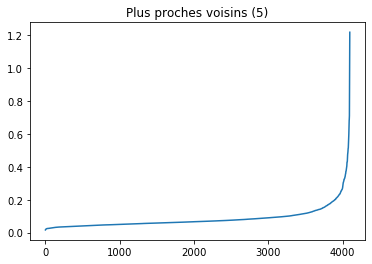

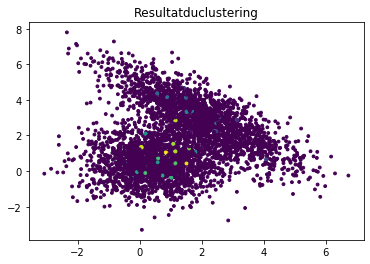

In [173]:
# On choisit epsilon
datanp=data_as_np("./artificial/engytime.arff")
# Distances k plus proches voisins
# Donnees dans X
X = datanp
k=5
neigh=NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances,indices=neigh.kneighbors(X)
#retirer le point "origine"
newDistances = np.asarray([np.average(distances[i][1:])for i in range(0,distances.shape[0])])
trie=np.sort(newDistances)
plt.title("Plus proches voisins (5)")
plt.plot(trie);
plt.show()


# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

#Affichage clustering
model = DBSCAN(eps=0.02, min_samples=3).fit(datanp)
plt.scatter(f0,f1,c=model.labels_,s=8)
plt.title("Resultatduclustering")
plt.show()


## HDBSCAN

In [174]:
import hdbscan

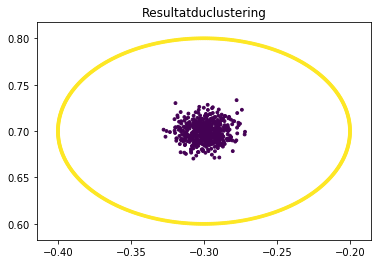

In [175]:
datanp=data_as_np("./artificial/donut1.arff")
# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

#plt.scatter(f0, f1, s=8)
#plt.title("Donnees initiales")
#plt.show()

#Affichage clustering
model = hdbscan.HDBSCAN(min_cluster_size=7)
labels = model.fit_predict(datanp)
plt.scatter(f0,f1,c=labels,s=8)
plt.title("Resultatduclustering")
plt.show()

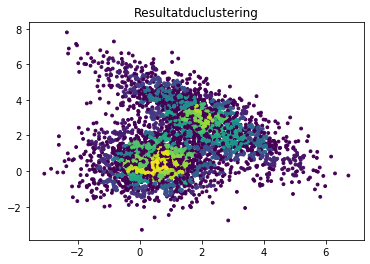

In [176]:
# On choisit epsilon
datanp=data_as_np("./artificial/engytime.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

#Affichage clustering
model = hdbscan.HDBSCAN(min_cluster_size=3)
labels = model.fit_predict(datanp)
plt.scatter(f0,f1,c=labels,s=8)
plt.title("Resultatduclustering")
plt.show()

Le HDBSCAN semble détecter plus précisément

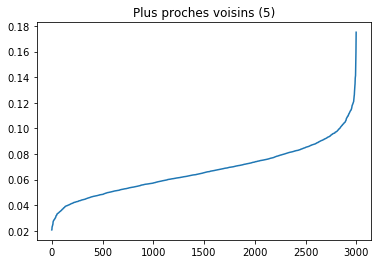

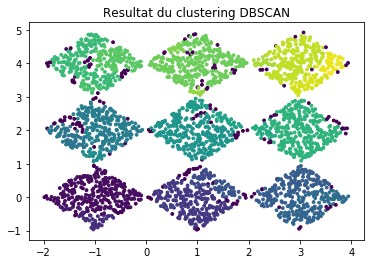

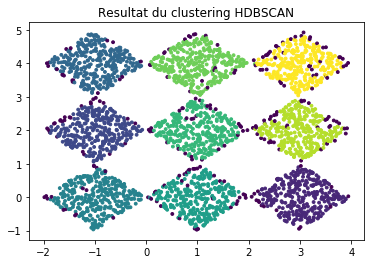

Runtime hsbcan :  0.11  ms, Runtime dbscan :  29.28  ms


In [177]:
# On choisit epsilon
datanp=data_as_np("./artificial/diamond9.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]
# Distances k plus proches voisins
# Donnees dans X
X = datanp
k=5
neigh=NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances,indices=neigh.kneighbors(X)
#retirer le point "origine"
newDistances = np.asarray([np.average(distances[i][1:])for i in range(0,distances.shape[0])])
trie=np.sort(newDistances)
plt.title("Plus proches voisins (5)")
plt.plot(trie);
plt.show()

#Affichage clustering
tps1 = time.time()
model = DBSCAN(eps=0.14, min_samples=10).fit(datanp)
tps2 = time.time()
runtime_dbscan = round((tps2-tps1)*1000,2)
plt.scatter(f0,f1,c=model.labels_,s=8)
plt.title("Resultat du clustering DBSCAN")
plt.show()

#Affichage clustering
tps1 = time.time()
model = hdbscan.HDBSCAN(min_cluster_size=10)
tps2 = time.time()
labels = model.fit_predict(datanp)
runtime_hdbscan = round((tps2-tps1)*1000,2)
plt.scatter(f0,f1,c=labels,s=8)
plt.title("Resultat du clustering HDBSCAN")
plt.show()

print("Runtime hsbcan : ", runtime_hdbscan, " ms, Runtime dbscan : ", runtime_dbscan," ms")

Le clustering HDBSCAN est bien plus rapide pour un résultat équivalent